# Workshop Week 4

# Deep Learning for Name Gender Classification

We have already seen the following code for partitioning the data of name gender classification and feature extraction. The code is changed slightly so that the labels are numerical (0 for male, 1 for female). This is the format required for Keras:

In [1]:
import nltk
nltk.download('names')
from nltk.corpus import names
m = names.words('male.txt')
f = names.words('female.txt')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\jakev_000\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


In [2]:
import random
random.seed(1234) # Set the random seed to allow replicability
names = ([(name,0) for name in m] +
         [(name,1) for name in f])
random.shuffle(names)
train_names = names[1000:]
devtest_names = names[500:1000]
test_names = names[:500]

In [3]:
def one_hot_character(c):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    result = [0]*(len(alphabet)+1)
    i = alphabet.find(c.lower())
    if i >= 0:
        result[i] = 1
    else:
        result[len(alphabet)] = 1 # character is out of the alphabet
    return result

def gender_features_n(word, n=2):
    "Return the one-hot encodings of the last n characters"
    features = []
    for i in range(n):
        if i < len(word):
            features = one_hot_character(word[-i-1]) + features
        else:
            features = one_hot_character(' ') + features
    return features

In [4]:
gender_features_n("Mary", n=2)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [5]:
# Let's determine the number of features so that we can use this information when we design the neural network
len(gender_features_n("Mary", n=2))

54

## Exercise: Simple Neural Network
Design a simple neural network that has 54 input cells (that's the number of gender features for $n=2$, as we have seen above), and one output cell (without a hidden layer). The output cell will be used to classify the name between male (output=0) and female (output=1). This is therefore an instance of **binary classification**. Pay attention to the right activation function! This simple model, without hidden layers, is equivalent to a **logistic regression** classifier. The model summary should look like this:

```
Layer (type)                 Output Shape              Param #   
=================================================================
dense_2 (Dense)              (None, 1)                 55        
=================================================================
Total params: 55
Trainable params: 55
Non-trainable params: 0
```


Compile the model and provide the right loss function. Use `'rmsprop'` as the optimiser, and include `'accuracy'` as an evaluation metric. 
Run the network **for 100 epochs** using batch size of 100, and observe the results. 

Answer the following questions:

1. What is the best result on the validation set?
2. At the epoch with best result on the validation set, what is the result on the training set?
3. Is the system overfitting? Justify your answer.
4. Do we really need 100 epochs? Do we need more than 100 epochs? would the system run better with less epochs?

In [17]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2.3.0
Num GPUs Available:  0


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [18]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [19]:
# creating inputs and labels
import numpy as np
print(train_names[:5])

x_train, y_train = [], []

for name, gend in train_names:
    x_train.append(gender_features_n(name,2))
    y_train.append(gend)

x_train=np.array(x_train)
y_train=np.array(y_train)



x_devtest, y_devtest= [],[]
for name, gend in devtest_names:
    x_devtest.append(gender_features_n(name,2))
    y_devtest.append(gend)

x_devtest=np.array(x_devtest)
y_devtest=np.array(y_devtest)

print(np.shape(x_train))
print(y_train[3])

train_dataset=tf.data.Dataset.from_tensor_slices((x_train,y_train))
devtest_dataset=tf.data.Dataset.from_tensor_slices((x_devtest,y_devtest))

list(train_dataset.as_numpy_iterator())[:5]

[('Marna', 1), ('Thadeus', 0), ('Jereme', 0), ('Winny', 1), ('Revkah', 1)]
(6944, 54)
1


[(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  1),
 (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
  0),
 (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  0),
 (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
  1),
 (array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  1)]

In [35]:
import numpy as np
from tensorflow.keras import models, Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense


epoch=200
b_size=64000
opt=tf.keras.optimizers.SGD(learning_rate=0.01)
model = Sequential([Dense(1,activation='sigmoid',input_shape=(54, ))])

model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['acc'])

history = model.fit(x=x_train,y=y_train,batch_size=b_size,epochs=epoch,validation_data=(x_devtest,y_devtest))
history_dict=history.history



Epoch 1/200
1/1 [==============================] - 0s 102ms/step - loss: 0.6527 - acc: 0.6362 - val_loss: 0.6537 - val_acc: 0.6060
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6524 - acc: 0.6362 - val_loss: 0.6534 - val_acc: 0.6060
Epoch 3/200
1/1 [==============================] - 0s 12ms/step - loss: 0.6522 - acc: 0.6362 - val_loss: 0.6532 - val_acc: 0.6060
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 0.6519 - acc: 0.6362 - val_loss: 0.6529 - val_acc: 0.6080
Epoch 5/200
1/1 [==============================] - 0s 12ms/step - loss: 0.6517 - acc: 0.6336 - val_loss: 0.6526 - val_acc: 0.6080
Epoch 6/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6514 - acc: 0.6336 - val_loss: 0.6524 - val_acc: 0.6080
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 0.6512 - acc: 0.6334 - val_loss: 0.6522 - val_acc: 0.6100
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6510 - acc: 0.6

In [ ]:
model.summary()
history_dict.keys()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 55        
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

(write additional code for the partition of the data, your experiments, and your analysis. Write the answers to the questions.)

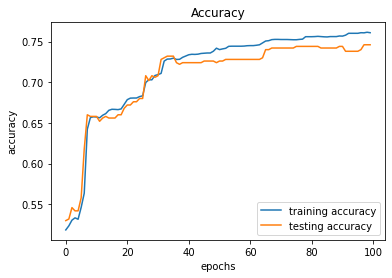

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

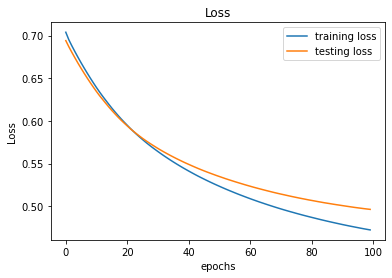

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

## Exercise: A Deeper Network
Experiment with a network that has one hidden dense layer with a `'relu'` activation. The resulting system is no longer a logistic regression classifier, it's something more complex. Try the following sizes in the hidden layer:

* 5, 7, 10

Answer the following questions:

1. Which system performed best on the dev-test set?
2. Would you add more or less cells in the hidden layer? Justify your answer.
3. Is this system better than the simpler system of the previous exercise? Justify your answer.

# Optional: Deep Learning with the Movie Review Corpus
The notebook [W04L1-2-MovieReviews.ipynb](../lectures/W04L1-2-MovieReviews.ipynb) has several questions at the end, repeated below. Try to answer these, and indeed try other variants!

* We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
* Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
* Try to use the `mse` loss function instead of `binary_crossentropy`.
* Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.